# SICSS-AMU/Law 2024
## June 17, 2024 | Adam Mickiewicz University
![](https://drive.google.com/uc?export=view&id=1-XuMzYGaD6X4dfFxA_fqaJAWzub8S7ky)
#### prepared by Mateusz Mroziński
[Github](https://github.com/gepetto2)

# Abstract



**Natural Language Processing** is a field in computer science (frequently considered also a branch of Artificial Intelligence) that focus on manipulating and extrating information from text written in human languages.

As humans, we have no problem understanding, for example, this text. Unfortunately, computers cannot do the same - they operate on numbers, values and equations. Despite that, with our help and a bit of configuration, we can try to use computers to extract some statistical informations, manipulate text and - with help of new and advanced language models - even summarize a text portion and many more!

Colab supports two programming languages - R and Python. We will use the latter, which is perfect for Natural Language Processing, thanks to a large number of existing libraries - packages of code covering a lot of NLP tasks. This will make our task a lot easier, as we don't have to build the code from the ground.

#Natural Language Processing

**Before we start...**

Please start by copying this notebook to your own Drive. It will allow you to edit the code and save your progress. To do this, click the Copy to Drive button.

Next, click the Connect button to connect to external machine. Google Colabs are very convenient - they work in the cloud, so you don't need to install all the requirements to your own computer. If you see a green checkmark ✔️, you're ready to start working!

Code in this notebook is divided into many fragments, called cells. You can run every code cell by clicking Run button ▷ on the left side. The output of the code (if there's any) will appear below the code cell.

Notice, the code contains a lot of green lines preceded by # sign. These are called comments - they do not impact the output, they are only there for you to understand the code better.

You can try the one below!


In [ ]:
# Let's display some simple text
print("Hello world!")

Hello world!


In [ ]:
# @title ❗ Please run this code ❗ It's important for better text formatting
# ----------------------------------------------------------------------------------------
# You can ignore this code, it's only needed so the displayed text looks better
from IPython.display import HTML, display

deepl_key = '0a3beb35-1d5a-4dae-b20f-a31fb8396ed8:fx'

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Obtaining legal documents and pre-processing

To present capabilities of Natural Language Processing, we need a text source to process. [EUR-Lex ](https://eur-lex.europa.eu/homepage.html) portal is perfect for that. It's an online database of European Union's legal documents. It's available in different languages and is updated regularly. If you want to know more, [here's a short video](https://www.youtube.com/watch?v=1k7FXMO-W6U) about it.

Now we need to obtain actual text content. We'll use **web scraping** - it's a process of obtaining information from websites. There are a lot of ways to do that. We will use external libraries: `requests` to access the document and `BeautifulSoup` to prepare it for NLP.

Usually, before importing libraries you need to **install** them first, but fortunately Colab notebooks come with a package of popular libraries, so these ones are already installed.

We need to import them first - prepare them for later use. Let's do it now:

In [ ]:
import requests
from bs4 import BeautifulSoup


We haven't decided yet what exactly we want to work with! Let's analyse one of documents in the Artificial Intelligence Act. If you want, you can check it out [here](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:52021PC0206).

Before we start actual coding, let's briefly explain some fundamentals:

**Variables** are pieces of whatever information we need to use - numbers, text, lists and many other objects. You can think of them as boxes, to which you can put something and computer will remember that and let you use it later.

![](https://drive.google.com/uc?export=view&id=182quhb1eS_-S5g5uzXfN2R7HktWz6cmC)

A **function** is a block of code that performs a specific task; it usually takes some arguments, performs some transformations or calculations using them and returns a result. You can define your own functions, but in our case we will use existing functions from external libraries, so you only need to know how to **call** existing functions.

![](https://drive.google.com/uc?export=view&id=1P03cF13KGcOTuU6LL6B63U2L4FwWJpA6)

In [ ]:
# We specify URL address we want to

URL_address = "https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:52021PC0206"
page_source = requests.get(URL_address)

As we already did the first step, why not try to see our result!

In [ ]:
# Let's display the first 10000 characters of our text
print(page_source.text[:10000])

<html xmlns:html="http://www.w3.org/1999/xhtml"><head><meta name="format-detection" content="telephone=no"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><script type="text/javascript" src="/eurlex-frontoffice/ruxitagentjs_ICANVfgqrux_10281231207105659.js" data-dtconfig="app=47d4c64c3b67ec69|agentId=daf5c5adbd7ceee|featureHash=ICANVfgqrux|rdnt=1|uxrgce=1|bp=3|cuc=m097nmfl|mel=100000|mb=null|dpvc=1|iub=null|ssv=4|lastModification=1718623454467|tp=500,50,0|agentUri=/eurlex-frontoffice/ruxitagentjs_ICANVfgqrux_10281231207105659.js|reportUrl=/eurlex-frontoffice/rb_39a3e95b-5423-482c-879b-99ef235dffeb|rid=RID_114193580|rpid=-1796909221|domain=europa.eu"></script><style type="text/css">@import url(./../../../../css/com/com-c.css)</style></head><body>
      <div class="contentWrapper">
         <div class="content"><!--all docVars name and value:(38),[name=CR_RefLast;value="0"],[name=DQCDateTime;value="2021-04-15 12:58:26"],[name=DQCRepairStyles;value=";Considérant;"],[na

As you can see, it's a lot of mess. That's because we copied not only raw text, but whole source of a page with a lot of complicated elements we don't need. So now we need to clean it up - that's where `BeautifulSoup` will be helpful.

In [ ]:
# Let's convert our page to BeautifulSoup object

soup = BeautifulSoup(page_source.content, "html.parser")

# It already should look better, but let's do one more thing - remove footnote references

for element in soup.find_all('span', {'class':'FootnoteReference'}):
    element.decompose()

Let's try to display text now:

In [ ]:
# Let's display the first 10000 characters of our text again
print(soup.get_text(strip=True)[:10000])

EUROPEAN COMMISSIONBrussels, 21.4.2021COM(2021) 206 final2021/0106(COD)Proposal for aREGULATION OF THE EUROPEAN PARLIAMENT AND OF THE COUNCILLAYING DOWN HARMONISED RULES ON ARTIFICIAL INTELLIGENCE (ARTIFICIAL INTELLIGENCE ACT) AND AMENDING CERTAIN UNION LEGISLATIVE ACTS{SEC(2021) 167 final} - {SWD(2021) 84 final} - {SWD(2021) 85 final}EXPLANATORY MEMORANDUM1.CONTEXT OF THE PROPOSAL1.1.Reasons for and objectives of the proposalThis explanatory memorandum accompanies the proposal for a Regulation laying down harmonised rules on artificial intelligence (Artificial Intelligence Act). Artificial Intelligence (AI) is a fast evolving family of technologies that can bring a wide array of economic and societal benefits across the entire spectrum of industries and social activities. By improving prediction, optimising operations and resource allocation, and personalising service delivery, the use of artificial intelligence can support socially and environmentally beneficial outcomes and provide 

Looks a lot better! Maybe for human it's a little hard to read, as it's not divided into paragraphs, but for a computer it's good enough.

As the document is very long, in some of the excercises we will focus only on the first chapter. We will create two **variables** - `full_text` and `short_text`.

In [ ]:
full_text = soup.get_text(strip=True)

# Here's code to extract only the first chapter - don't worry if it looks complicated

short_text = ""

for element in soup.find_all("p", {'class':['Normal', 'li ListBullet1']})[0:24]:
    short_text = short_text + element.get_text(strip=True) + '\n'

## Searching and filtering using Regular Expressions

**Regex**, short for **Regular Expression** is basically a pattern built with a sequence of characters. It is used widely in many different tasks, for example:
*   Filtering and searching
*   Validating user input (for example in web forms)
*   Replacing specific sequences with other ones

Regex is composed of tokens - you could call them placeholders for things (characters, words etc.) we will be searching for. For example `\d` means any digit. They can be combined into groups using square brackets. There are also quantifiers, which are added after a token in curly brackets.

Here's a little cheat sheet explaining basics of Regex. At any point you can come back here for help

![](https://drive.google.com/uc?export=view&id=1FCmJKAgRYpA0B3azUBbtlxfoJh9t4ram)

There's a lot more to it - Regex is a complicated tool and even advanced programmers can struggle with remembering all the rules - don't worry if you don't fully understand it at first. [Here's a great resource](https://regexr.com/) for learning and experimenting - you can check it out!



Let's start by importing `re` library

In [ ]:
import re

Let's try to find every money amount mentioned in the document using Regex. Assuming the format is `<amount> EUR`, for example `1000 EUR`, our Regular Expression could look like this:

`[\d ]*\d EUR`



Let's break it down into parts:


* `[\d ]*` - any combination of digits and spaces
* `\d` - one digit
* ` ` - one space
* `EUR` - literally letters "EUR"



In [ ]:
matches_list =  re.findall(r'[\d ]*\d EUR', full_text)

for single_match in matches_list:
  print(single_match)

 30 000 000 EUR
 20 000 000 EUR
 10 000 000 EUR
 500 000 EUR
 250 000 EUR


It's working - we found some matches, but it would be nice to have some context. First, let's specify how much (in terms of character count) context we want to see:

In [ ]:
left_context = 60
right_context = 60

Now, we'll iterate over matches list and print them, this time including some context

In [ ]:
for single_match in matches_list:
    # Find the starting position of the match in the full_text
    start_position = full_text.find(single_match)

    # Calculate the start and end positions of the context
    context_start = start_position - left_context
    context_end = start_position + len(single_match) + right_context

    # Extract the context from the full_text
    context = full_text[context_start : context_end]

    print(context)

ringements shall be subject to administrative fines of up to 30 000 000 EUR or, if the offender is company, up to 6 % of its total worl
 5 and 10, shall be subject to administrative fines of up to 20 000 000 EUR or, if the offender is a company, up to 4 % of its total wo
 a request shall be subject to administrative fines of up to 10 000 000 EUR or, if the offender is a company, up to 2 % of its total wo
ringements shall be subject to administrative fines of up to 500 000 EUR:(a)non-compliance with the prohibition of theartificial int
 5 and 10, shall be subject to administrative fines of up to 250 000 EUR.4.Before taking decisions pursuant to this Article, the Eur


## Most frequent words and wordcloud

Common way of analyzing text is compiling most frequent words. We'll use `Counter` from `collections` library to count how many each word appears in the text, then `pandas` and `matplotlib` to convert it into graphic chart.

<Axes: ylabel='words'>

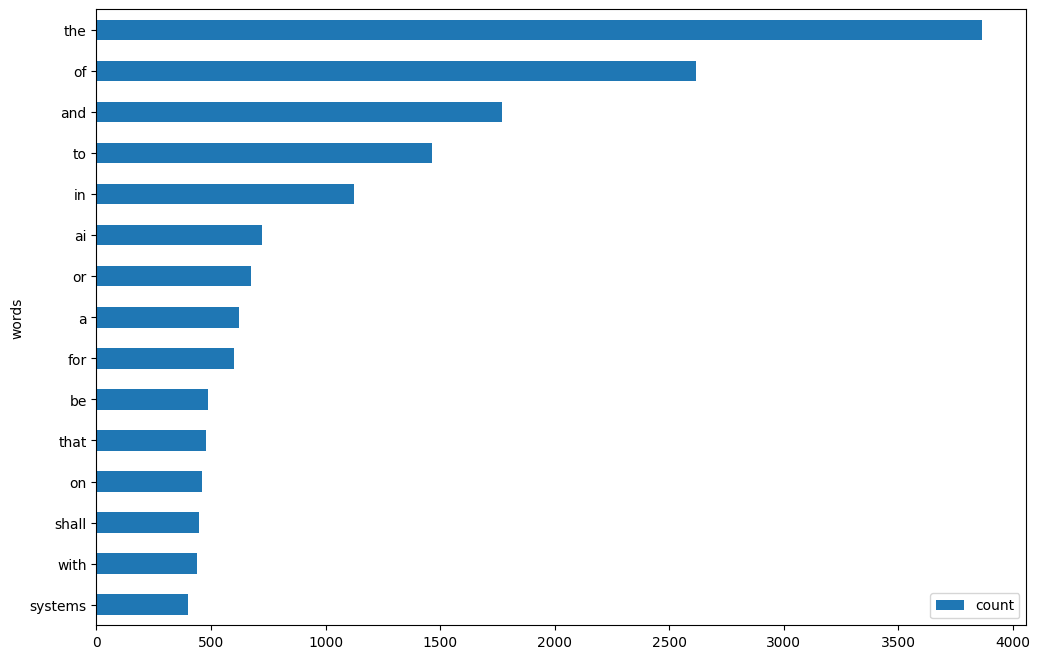

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Tokenize the text into words
words = full_text.split()

# Create a counter of word frequencies in the text, converting all words to lowercase
word_counts = Counter(word.lower() for word in words)

# Create a DataFrame with the 15 most common words and their counts
word_freq = pd.DataFrame(word_counts.most_common(15), columns=['words', 'count'])

# Plot the word frequencies as a horizontal bar chart
word_freq.sort_values(by='count').plot.barh(x='words', y='count', figsize=(12, 8))

As you can see, there's one problem with our plot - it consists mostly of very common English words, like "the", "and" etc. These words are called **stopwords** and they don't really give us any useful information about the text. We want to eliminate them.

We will repeat the previous code, but this time during counting we'll check if given word is a **stopword**.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<Axes: ylabel='words'>

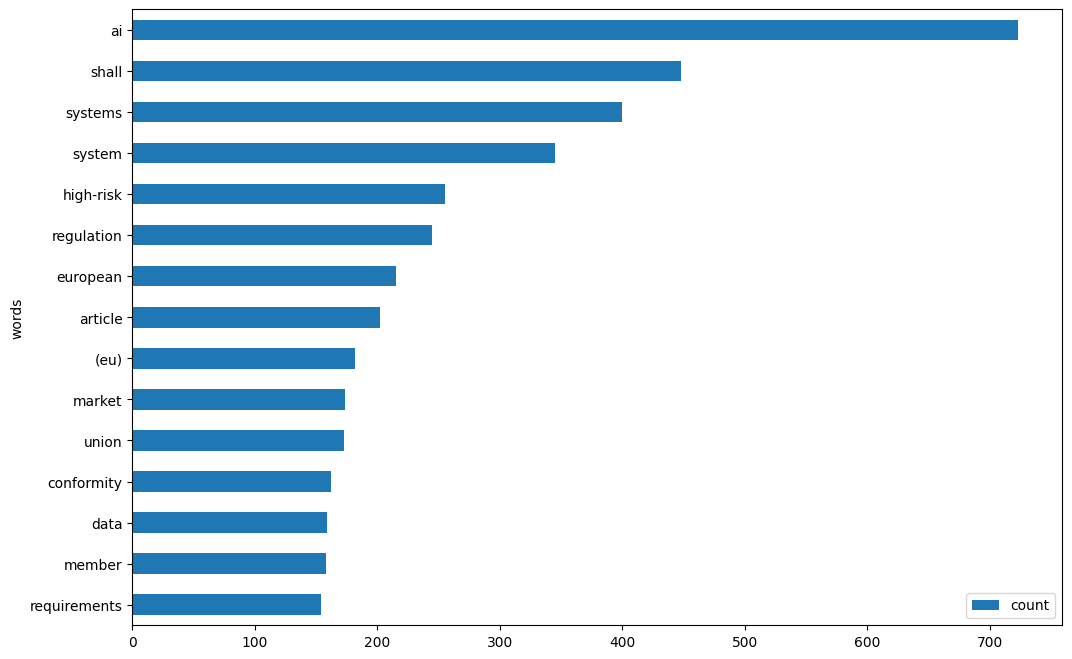

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the text into words
words = full_text.split()

# Count word frequencies excluding stopwords
word_counts = Counter(
    word.lower() for word in words if word.lower() not in stop_words
)

# Create a DataFrame with the 15 most common words and their counts
word_freq = pd.DataFrame(word_counts.most_common(15), columns=['words', 'count'])

# Plot the word frequencies as a horizontal bar chart
word_freq.sort_values(by='count').plot.barh(x='words', y='count', figsize=(12, 8))

You can often see most frequent words visualized as a "word-cloud" - a graphical collage of words, where the most frequent and important are the biggest and vice-versa. We'll use `wordcloud` library. Let's install it first.

In [ ]:
!pip install wordcloud

The use of this library is pretty straightforward:

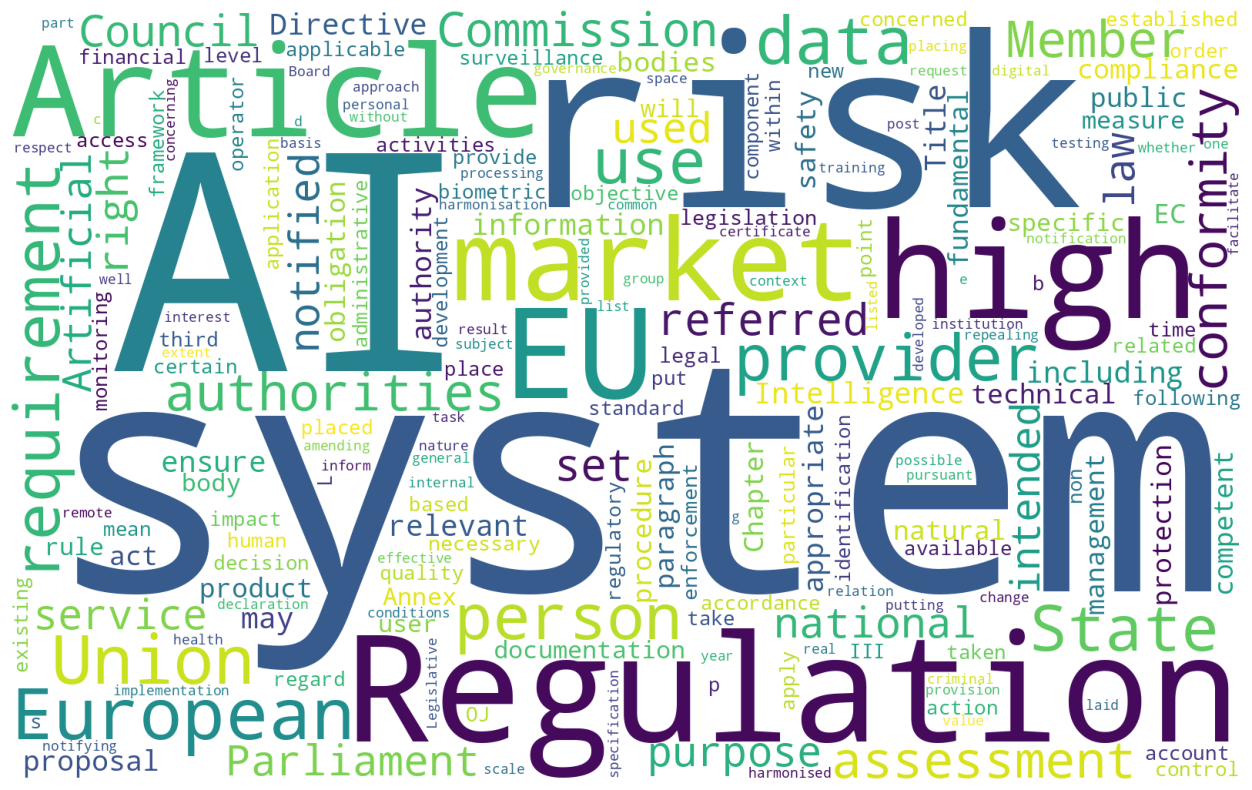

In [ ]:
from wordcloud import WordCloud

cloud = WordCloud(
    background_color='white',
    width=1600,
    height=1000,
    collocations=False
).generate(full_text)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(cloud)

## Machine translation

One of the most common text transformations is translating it to a different language. Of course best result is achieved by manual translation by a human, but sometimes, when it's necessary, machine translation is a good alternative. We will use `deep-translator` library. Let's install it.

In [ ]:
!pip install -U deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00


Library `deep-translator` offers services of top translators, such as Google Translate, DeepL, Microsoft Translator, ChatGPT and many many others. To access some of them, you'll need an API key, which isn't always free to obtain. For example - DeepL translator offers a free API key up to 500 000 translated characters every month.

Let's try translating text using DeeplTranslator

In [ ]:
from deep_translator import DeeplTranslator

translated1 = DeeplTranslator(api_key=deepl_key, source="english", target="polish", use_free_api=True).translate(short_text[:4359])

print(translated1)

Niniejsze uzasadnienie towarzyszy wnioskowi dotyczącemu rozporządzenia ustanawiającego zharmonizowane przepisy dotyczące sztucznej inteligencji (Artificial Intelligence Act). Sztuczna inteligencja (AI) to szybko rozwijająca się rodzina technologii, która może przynieść szeroki wachlarz korzyści gospodarczych i społecznych w całym spektrum branż i działań społecznych. Poprawiając przewidywanie, optymalizując operacje i alokację zasobów oraz personalizując świadczenie usług, wykorzystanie sztucznej inteligencji może wspierać korzystne społecznie i środowiskowo wyniki oraz zapewniać kluczową przewagę konkurencyjną przedsiębiorstwom i gospodarce europejskiej. Takie działania są szczególnie potrzebne w sektorach o dużym wpływie, w tym w sektorze zmian klimatu, środowiska i zdrowia, sektorze publicznym, finansach, mobilności, sprawach wewnętrznych i rolnictwie. Jednak te same elementy i techniki, które napędzają społeczno-gospodarcze korzyści AI, mogą również powodować nowe zagrożenia lub ne

Now let's try a different one, GoogleTranslator

In [ ]:
from deep_translator import GoogleTranslator

translated2 = GoogleTranslator(source='english', target='polish').translate(short_text[:4359])

print(translated2)

Niniejsze uzasadnienie towarzyszy wnioskowi dotyczącemu rozporządzenia ustanawiającego zharmonizowane zasady dotyczące sztucznej inteligencji (ustawa o sztucznej inteligencji). Sztuczna inteligencja (AI) to szybko rozwijająca się rodzina technologii, która może przynieść szeroki wachlarz korzyści gospodarczych i społecznych w całym spektrum branż i działań społecznych. Dzięki poprawie przewidywania, optymalizacji operacji i alokacji zasobów oraz personalizacji świadczenia usług wykorzystanie sztucznej inteligencji może wspierać wyniki korzystne dla społeczeństwa i środowiska oraz zapewnić kluczową przewagę konkurencyjną przedsiębiorstwom i gospodarce europejskiej. Takie działania są szczególnie potrzebne w sektorach o dużym wpływie, w tym w sektorach zmiany klimatu, środowiska i zdrowia, sektorze publicznym, finansach, mobilności, sprawach wewnętrznych i rolnictwie. Jednak te same elementy i techniki, które zapewniają społeczno-gospodarcze korzyści sztucznej inteligencji, mogą również 

## Document comparison

In above example, it would be nice to compare both texts. We wil try to do it using `difflib` library

In [ ]:
from difflib import Differ
from IPython.display import HTML, display

# Compare the two translated texts
diff = Differ().compare(translated1.split(), translated2.split())

`difflib` library adds different prefix to each word, depending if said word was removed, added or nothing was changed compared to first text. Let.s create a short HTML text to display changes between texts in a nice way.

In [ ]:
html_text = ''

for element in diff:
    prefix = element[0]
    word = element[2:]
    if prefix == ' ':  # Unchanged
      html_text += word+' '
    elif prefix == '-':  # Removed
      html_text += f'<span style="color: red; text-decoration: line-through;">{word} </span>'
    elif prefix == '+':  # Added
      html_text += f'<span style="color: lime;">{word} </span>'
    elif prefix == '?':  # Separator
        continue  # Skip separators

# Display the formatted HTML text
display(HTML(html_text))

## Named Entity Recognition

A Named Entity Recognition (NER) extractor finds entities, which can be people, companies, or locations and exist within text data.

We'll use `spacy`. Let's import it.

In [ ]:
import spacy

Spacy has a built-in model `en_core_web_sm` but it's not very effective in our case. We'll use different one - `en_core_web_trf`, which is slower, but generates better results.

Let's download the model, and reload session.

❗ This code can take a while to finish, so be patient please ❗

In [ ]:
# Download a better model for NER
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-many

After downloading model we need to restart the session. Please run the following cell. Don't worry if you'll see "Your session crashed for an unknown reason"

In [ ]:
# @title ❗ Run this code cell to restart session ❗ Please ignore any error
import pickle
with open('data.pkl', 'wb') as f:
  pickle.dump(short_text, f)
  pickle.dump(full_text, f)

import os
os.kill(os.getpid(), 9)

As we restarted the session, we lost our variables. Let's recover them. Just run the code cell below.

In [ ]:
import pickle
with open('data.pkl', 'rb') as f:
    short_text = pickle.load(f)
    full_text = pickle.load(f)

We start by loading the model

❗ This code can take a while to finish, so be patient please ❗

In [ ]:
# Let's load the model we just downloaded
import spacy

nlp = spacy.load('en_core_web_trf')

# We will use our short text variable

doc = nlp(short_text)

# Spacy offers a nice way to display results - displacy.render()

spacy.displacy.render(doc, style="ent")

There are situations when we want just a list of entities and their types, without whole text. Let's print such list.

In [ ]:
import pandas as pd
from IPython.display import display

# Extract entities and their labels
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a DataFrame from the entities
df = pd.DataFrame(entities, columns=['text', 'type'])

# Display the DataFrame
pd.set_option('display.max_rows', None)
display(df)

,text,type
0,Artificial Intelligence Act,LAW
1,Artificial Intelligence,PRODUCT
2,European,NORP
3,EU,ORG
4,Union,ORG
5,EU,ORG
6,Europeans,NORP
7,Union,ORG
8,von der Leyen,PERSON
9,2019-2024,DATE


# Excercises

As for the excercises, please do similar tasks as above, with some changes (you can also experiment with a different document, if you feel like!):

**Exercise 1.**

Regex - try to create expression, which will help you find all dates in the document in the format `DD.MM.RRRR`, with 50 characters of context.

In [ ]:
# Place your code here!
import re

matches_list =  re.findall(r'\d{2}.\d{2}.\d{4}', full_text)

left_context = 50
right_context = 50

for single_match in matches_list:
  start_position = full_text.find(single_match)

  context = full_text[start_position - left_context : start_position + len(single_match) + right_context]

  print(context)

Total NoTotal costSPECIFIC OBJECTIVE No 1…Database11.000111110.10011.000Meetings- Output100.200100.200100.2001
atabase11.000111110.10011.000Meetings- Output100.200100.200100.200100.200100.200100.200501.000Communication ac
atabase11.000111110.10011.000Meetings- Output100.200100.200100.200100.200100.200100.200501.000Communication ac
0Meetings- Output100.200100.200100.200100.200100.200100.200501.000Communication activities20.04020.04020.04020
00100.200100.200501.000Communication activities20.04020.04020.04020.04020.04020.040100.040Subtotal for specifi
00100.200100.200501.000Communication activities20.04020.04020.04020.04020.04020.040100.040Subtotal for specifi
ommunication activities20.04020.04020.04020.04020.04020.040100.040Subtotal for specific objective No 1SPECIFIC
putSubtotal for specific objective No 2TOTALS130.240130.240130.240130.240130.240130.100652.2003.2.3.Summary of
putSubtotal for specific objective No 2TOTALS130.240130.240130.240130.240130.240130.100652.2003.2.3.Summary of
e

**Excercise 2.**

Perform a Named Entity Recognition, this time using the default model `en_core_web_sm`. Compare results and decide which is better.

In [ ]:
# Place your code here!
import spacy

nlp = spacy.load('en_core_web_sm')

doc = nlp(short_text)

spacy.displacy.render(doc, style="ent")

**Excercise 3.**

Create Wordcloud, but exclude the named argument `collocations=False`. Plot the Wordcloud, and explain the difference - is the result better or worse?

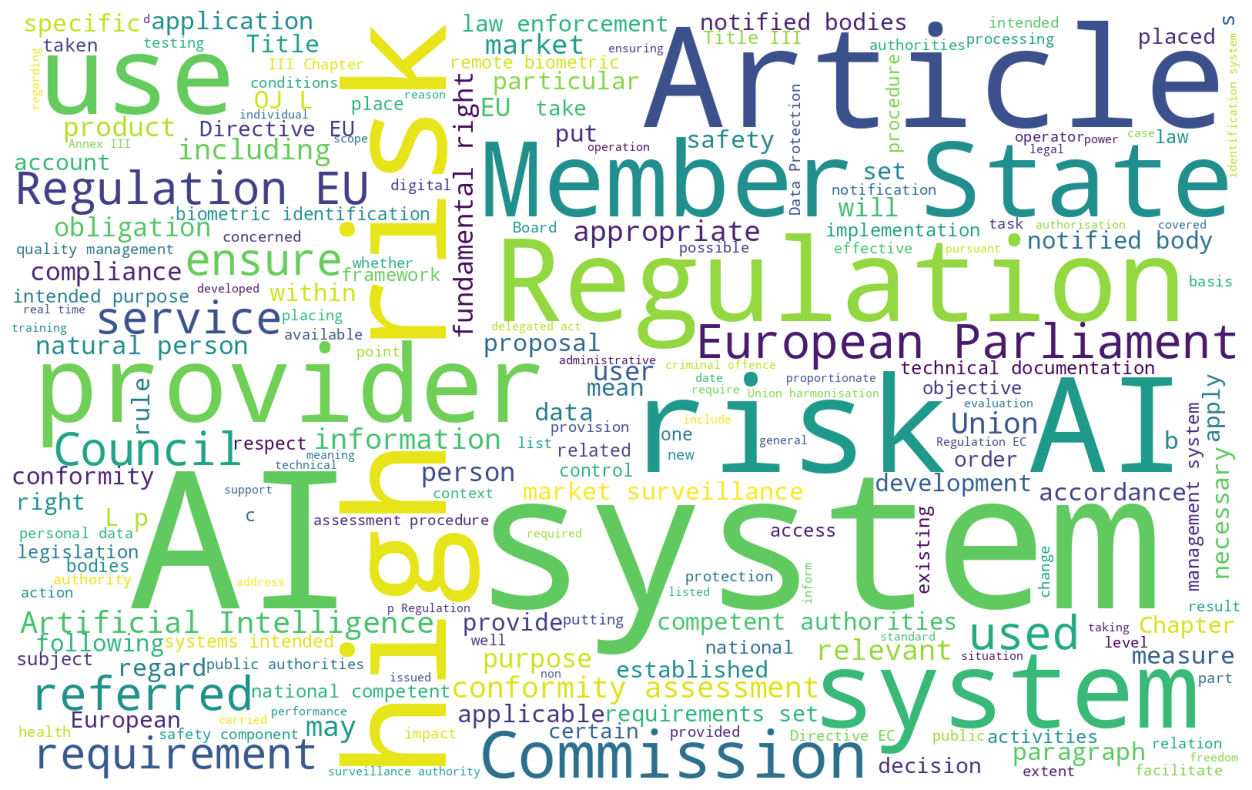

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(
    background_color='white',
    width=1600,
    height=1000
).generate(full_text)

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(cloud)

**Excercise 4.**

Most common words - create a bar chart of most common words in document, but change bar color to red and exclude extra words: "european", "union", "ai"

In [ ]:
# Place your code here!
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = full_text.split()

word_counts = Counter(
    word.lower() for word in words if (word.lower() not in stop_words and word.lower() not in ['european', 'union', 'ai']
))

word_freq = pd.DataFrame(word_counts.most_common(15), columns=['words', 'count'])

word_freq.sort_values(by='count').plot.barh(x='words', y='count', figsize=(12, 8))

**Excercise 5.**

Let's change the look of most frequent words chart. Change the type of chart to vertical bars, change color to red and set title to "Most frequent words". You can find useful information [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [ ]:
# Place your code here!

#HINT: To change type of chart from horizontal bars to vertical bars, just change function from barh to bar. Other parameters can be changed by adding arguments next to x, y and figsize.

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = full_text.split()

word_counts = Counter(
    word.lower() for word in words if word.lower() not in stop_words
)

word_freq = pd.DataFrame(word_counts.most_common(15), columns=['words', 'count'])

word_freq.sort_values(by='count').plot.bar(x='words', y='count', figsize=(12, 8), color='red', title='Most frequent words')

**Excercise 6.**

In the Named Entity Recognition, count how many of each entity types are in the text.

In [ ]:
# Place your code here!
import pandas as pd
from IPython.display import display
from collections import Counter

entities = [(ent.text, ent.label_) for ent in doc.ents]

df = pd.DataFrame(entities, columns=['text', 'type'])

type_counts = Counter(ent_type for ent_type in df['type'])

display(type_counts)

**Exercise 7.**

When we analyzed most frequent words in text, we were breaking it (or tokenizing) into single words. In NLP they are also called one-grams. Similarly, sequence of 2 words is called a bigram, sequence of 3 words is called a trigram etc. This concept is common in NLP and is called **N-gram**.

Now, as an excercise, try to create a graph of most common bigrams in the text.

In [ ]:
# Place your code here!

#HINT: when having word list in the variable words, you can get list of word pairs like that:
# word_pairs = [(words[i], words[i+1]) for i in range(len(words) - 1)]

import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = full_text.split()

word_pairs = [(words[i], words[i+1]) for i in range(len(words) - 1)]

word_pair_counts = Counter(
    (word1.lower(), word2.lower()) for word1, word2 in word_pairs
    if word1.lower() not in stop_words and word2.lower() not in stop_words
)

word_pair_freq = pd.DataFrame(word_pair_counts.most_common(15), columns=['word_pair', 'count'])

word_pair_freq.sort_values(by='count').plot.barh(x='word_pair', y='count', figsize=(12, 8))

**Exercise 8.**

Go to [www.deepl.com/pro-api](https://www.deepl.com/pro-api). Create a free account and generate your own free API key. Use the key and `deep_translator` library to translate this instruction to a language of your choice.

In [ ]:
# Place your code here!